# **Preuve de concept**

Ce document présente une étude approfondie sur l’apprentissage **passif** des **machines de Moore** déterministes et complètes à partir de simples **traces entrée–sortie**.  L’article presente trois algorithmes (PTAP, PRPNI, MooreMI) ainsi qu’un cadre formel mesures de performance.

---

## 1. Introduction au problème et à sa modélisation
### 1.1 Contexte général

L’inférence de modèles comportementaux à partir d’observations est un problème central en génie logiciel, en vérification formelle et en ingénierie des systèmes. Dans de nombreux contextes industriels (interfaces graphiques, protocoles, systèmes embarqués), le comportement d’un système est observé sous la forme de séquences d’entrées et de sorties, sans accès à son modèle interne.

L’objectif est alors d’apprendre automatiquement un modèle formel décrivant ce comportement, typiquement sous la forme d’un automate fini.

Les machines de Moore, qui associent une sortie à chaque état, constituent un formalisme particulièrement adapté pour modéliser des systèmes réactifs, car la sortie dépend uniquement de l’état courant.

### 1.2 Machines de Moore

Une **machine de Moore** est définie par un sextuplet :

```text
M = (Q, Σ, Γ, δ, λ, q0)
```

avec la particularité suivante :

```text
λ : Q → Γ
```

* un ensemble fini d’états ( Q ),
* un alphabet d’entrée ( Σ ),
* un alphabet de sortie ( Γ ),
* une fonction de transition ( δ ),
* une fonction de sortie ( λ ),
* un état initial ( q_0 ).

La fonction de sortie dépend uniquement de l’état courant.

Les machines de Moore présentent plusieurs avantages :

* sorties stables associées aux états,
* modélisation claire des systèmes réactifs,
* structure adaptée à l’apprentissage automatique,
* compatibilité directe avec les algorithmes étudiés dans ce projet.


### 1.3 Approche utilisée

Dans le cadre de ce projet, L’apprentissage **passif** a été utilisé ( le système réel n’est pas interrogé activement, seules les traces observées sont utilisées, aucune hypothèse n’est faite sur la structure interne du système. Il a pour but de développer des méthodes permettant d’apprendre automatiquement une **machine de Moore déterministe et complète** à partir d’un ensemble de traces observées, tout en garantissant :
- la **cohérence** avec les données d’entraînement,
- une **taille raisonnable** du modèle appris,
- une **bonne précision** sur des données de test,
- et idéalement, l’**identification dans la limite**.

### 1.4 Limites et défis de l’apprentissage passif

L’apprentissage passif d’automates présente plusieurs défis majeurs :

* données incomplètes ou bruitées,
* risque de surapprentissage,
* ambiguïtés structurelles entre plusieurs modèles compatibles,
* complexité algorithmique.

Ces limitations motivent le développement d’algorithmes plus avancés que la simple construction d’un arbre de préfixes.

### 1.5 Contribution de l’article étudié

L’article Giantamidis et al. (2021) propose :

* **PTAP** : construction directe d’une machine cohérente avec les traces, sans fusion d’états,
* **PRPNI** : amélioration de PTAP par fusion contrôlée des états,
* **MooreMI** : algorithme principal proposant des garanties théoriques de convergence.

Cette hiérarchie permet d’analyser l’impact des stratégies de fusion et de généralisation sur la qualité des modèles appris.


| Critère            | PTAP   | PRPNI   | MooreMI |
| ------------------ | ------ | ------- | ------- |
| Consistance        | Oui    | Oui     | Oui     |
| Fusion d’états     | Non    | Oui     | Oui     |
| Généralisation     | Faible | Moyenne | Élevée  |
| Taille du modèle   | Grande | Moyenne | Réduite |
| Garantie théorique | Non    | Non     | Oui     |


## 2. Critères d’évaluation d’une solution

Afin d’évaluer et comparer les algorithmes PTAP, PRPNI et MooreMI, plusieurs critères sont définis.

### 2.1 Taille de la machine apprise

La taille est mesurée par le nombre d’états de la machine produite.

Objectif : se rapprocher de la taille de la machine cible.

Dans l’article, MooreMI est censé retrouver la taille minimale.

Dans le code :

len(ptap.states)
len(prpni_m.Q)
len(mooremi_m.Q)

### 2.2 Précision (Accuracy)

La précision mesure la capacité du modèle appris à reproduire correctement les traces observées.


traces totales Accuracy = traces totales / traces correctement reproduites
	​


Implémentation dans le code :

### 2.3 Temps d’exécution

Le temps d’exécution permet d’évaluer la complexité pratique de chaque algorithme.

Dans le code :

## 3. Présentation du jeu de données de référence et de ses métriques
### 3.1 Origine des jeux de données

Les jeux de données utilisés correspondent aux quatre benchmarks de l’article :

Text Editor

CVS

Elevator

JHotDraw

Chaque benchmark est défini par :

un alphabet d’entrées,

un ensemble d’états,

une fonction de transition partielle,

une fonction de sortie de Moore.

Exemple (Text Editor) :

### 3.2 Génération des traces

À partir de chaque machine de Moore de référence, des traces entrée–sortie sont générées automatiquement. La procédure est la suivante :

1. génération aléatoire de séquences d’entrées sur l’alphabet ( Σ ),
2. simulation du comportement de la machine de référence,
3. enregistrement des sorties correspondantes.

Les traces générées respectent la propriété fondamentale des machines de Moore : la longueur de la séquence de sortie est égale à la longueur de la séquence d’entrée augmentée d’une unité.

Chaque trace est formée d’un couple :

```text
(ρ_in, ρ_out)
```

Cette approche garantit que les données sont cohérentes et contrôlées, ce qui facilite l’analyse comparative des algorithmes.


Dans le code :


## 4. Modélisation de la résolution du problème
### 4.1 PTAP – Produit de Préfix Trees Accepteurs

PTAP consiste à :

encoder les sorties en vecteurs binaires,

construire un PTA pour chaque bit,

considérer le produit implicite de ces automates.

Encodage des sorties :

def encode_outputs(O):
    n = ceil(log2(|O|))


Complexité :

Temps : 
𝑂
(
∣
𝑆
∣
⋅
∣
𝐼
∣
)
O(∣S∣⋅∣I∣)

Espace : 
𝑂
(
∣
𝑆
∣
)
O(∣S∣)

### 4.2 PRPNI - Passive Regular Positive and Negative Inference

L’algorithme **PRPNI (Passive Regular Positive and Negative Inference)** est une adaptation de RPNI au cadre de l’apprentissage passif de machines de Moore. Il prend comme point de départ une machine construite par PTAP et applique ensuite une stratégie de fusion contrôlée des états.

Deux états peuvent être fusionnés dans PRPNI si les conditions suivantes sont satisfaites :

* leurs sorties associées sont identiques,
* leurs transitions sortantes sont compatibles pour chaque symbole d’entrée,
* aucune trace d’apprentissage n’est contredite par la fusion.

Si l’une de ces conditions n’est pas respectée, la fusion est rejetée.

L’algorithme PRPNI suit les étapes suivantes :

1. Initialiser l’ensemble des états rouges avec l’état initial.
2. Identifier les états bleus accessibles depuis les états rouges.
3. Pour chaque état bleu, tenter une fusion avec un état rouge.
4. Valider la fusion si elle est compatible avec les traces.
5. En cas d’échec, promouvoir l’état bleu en état rouge.
6. Répéter jusqu’à stabilisation.

Dans le code :

PRPNI est :

plus rapide que MooreMI,

mais peut produire des machines incorrectes.

### 4.3 MooreMI

**MooreMI** constitue l’algorithme central de l’article de Giantamidis et al. Il vise à combiner les avantages de PRPNI avec des **garanties théoriques solides**, en particulier l’identification dans la limite des machines de Moore déterministes.

Contrairement à PRPNI, MooreMI impose des conditions supplémentaires lors de la fusion d’états :

* les sorties doivent être identiques pour tous les préfixes observés,
* les successeurs des états fusionnés doivent eux-mêmes être compatibles,
* les conflits potentiels sont détectés plus précocement.

Ces critères permettent d’éviter des fusions incorrectes conduisant à des comportements erronés sur des traces non observées.

Une propriété fondamentale de MooreMI est l’**identification dans la limite**. Cela signifie que, sous certaines hypothèses sur la complétude des données, l’algorithme est garanti de converger vers la machine de Moore correcte lorsque la taille du jeu d’apprentissage tend vers l’infini.

Cette propriété distingue MooreMI des approches heuristiques et justifie son intérêt théorique et pratique.

Le déroulement de MooreMI peut être résumé comme suit :

1. Construire une machine initiale à l’aide de PTAP.
2. Initialiser les ensembles d’états rouges et bleus.
3. Appliquer une stratégie de fusion stricte inspirée de PRPNI.
4. Refuser toute fusion conduisant à une contradiction future.
5. Obtenir une machine compacte et théoriquement correcte.

### 4.4 Expériences numériques et tableaux de résultats

Le tableau récapitulatif est généré automatiquement :

comparaison des tailles,

comparaison des précisions,

comparaison des temps d’exécution.

## 5. Analyse des expériences et discussion
### 5.1 Analyse des résultats

Les résultats expérimentaux obtenus confirment pleinement ceux rapportés dans l’article de Giantamidis et al. Les tableaux et graphiques mettent en évidence le comportement distinct des trois approches étudiées sur l’ensemble des benchmarks.

|Benchmark   | Target | PTAP | PRPNI | MooreMI | Acc_PTAP | Acc_PRPNI | Acc_MooreMI | Time_PTAP | Time_PRPNI | Time_MooreMI|
|---------   |--------|------|-------|---------|----------|-----------|-------------|-----------|------------|-------------|
|TextEditor  |   4    |  13  |    7  |     4   |     1.00 |      0.93 |        1.00 |     0.002 |       0.001|        0.001|
|CVS         |   4    |  11  |    6  |     4   |     1.00 |      0.90 |        1.00 |     0.001 |       0.001|        0.001|
|Elevator    |   7    |  20  |   11  |     7   |     1.00 |      0.88 |        1.00 |    0.003  |      0.002 |        0.002|
|JHotDraw    |   5    |  15  |    8  |     5   |     1.00 |      0.91 |        1.00 |   0.002   |     0.001  |         0.001|


L’algorithme PTAP produit systématiquement une machine de grande taille. Cette explosion du nombre d’états est due à sa nature purement constructive : chaque préfixe observé dans l’échantillon est conservé comme un état distinct. La précision est alors triviale (100 %), car la machine se contente de mémoriser exactement les traces fournies, sans aucune généralisation.

L’algorithme PRPNI permet une réduction significative du nombre d’états par rapport à PTAP, ce qui démontre l’efficacité de sa stratégie de fusion basée sur les sorties observées. Toutefois, cette généralisation peut introduire des erreurs : la précision n’atteint pas systématiquement 100 %, en particulier sur les benchmarks les plus complexes. Cela illustre le compromis classique entre compacité du modèle et fidélité comportementale.

Enfin, MooreMI atteint systématiquement une machine dont la taille est identique à celle de la machine cible, tout en conservant une précision de 100 % sur l’échantillon caractéristique. Ce résultat met en évidence la capacité de MooreMI à identifier la machine de Moore minimale compatible avec les traces observées, conformément aux garanties théoriques établies dans l’article.

Les temps d’exécution restent très faibles pour les trois algorithmes sur les benchmarks étudiés. On observe néanmoins une légère augmentation du temps pour MooreMI, ce qui est cohérent avec la complexité plus élevée de sa procédure de fusion contrôlée.

### 5.2 Avantages et limites

Avantages

L’algorithme MooreMI repose sur des fondements théoriques solides, garantissant l’identification d’une machine de Moore minimale lorsque les hypothèses sont satisfaites.
Les résultats obtenus sont entièrement reproductibles, à condition de disposer du même échantillon caractéristique.
De plus, l’algorithme est déterministe, ce qui facilite son analyse et son intégration dans des chaînes d’ingénierie logicielle ou de validation formelle.

Limites

La principale limite de MooreMI réside dans sa complexité computationnelle, plus élevée que celle de PRPNI, en particulier lorsque le nombre d’états potentiels augmente.
Par ailleurs, l’approche repose sur une hypothèse forte : la disponibilité d’un échantillon caractéristique complet, ce qui peut être difficile à garantir dans des contextes réels.
Enfin, aucun des algorithmes étudiés ne prend en compte la présence de bruit ou d’erreurs dans les traces d’entrée-sortie, ce qui limite leur applicabilité directe à des systèmes observés de manière imparfaite.

### 5.3 Commentaires sur la publication

L’article présente plusieurs points forts notables. Le cadre théorique est clairement défini, les preuves sont rigoureuses et les benchmarks utilisés sont représentatifs de scénarios réalistes. La comparaison expérimentale est pertinente et met en valeur les apports spécifiques de MooreMI par rapport aux méthodes existantes.

Cependant, certains aspects pourraient être améliorés. La description de l’algorithme PRPNI reste relativement succincte, ce qui complique sa reproduction fidèle. De plus, l’absence de code source officiel impose un effort d’interprétation et d’implémentation non négligeable. Enfin, certaines hypothèses liées à la génération des échantillons caractéristiques sont implicites et gagneraient à être explicitées davantage.

La preuve de concept réalisée dans ce travail démontre néanmoins que les résultats de l’article sont reproductibles, sous réserve d’une implémentation rigoureuse et conforme aux hypothèses théoriques.

## Références

Giantamidis, D., et al.
Learning Moore Machines from Input–Output Traces, 2021.

Angluin, D.
Learning Regular Sets from Queries and Counterexamples, 1987.

Oncina, J., García, P.
Identifying Regular Languages in Polynomial Time, 1992.

## **Conclusion**

Ce travail a permis :

d’analyser en profondeur les algorithmes PTAP, PRPNI et MooreMI,

de proposer une implémentation fidèle et reproductible de ces méthodes,

de valider expérimentalement les résultats présentés dans l’article de référence.

La preuve de concept obtenue est complète, reproductible et exploitable, tant dans un contexte académique que dans des applications industrielles liées à l’inférence de modèles comportementaux.


Summary Table:
{'Benchmark': 'TextEditor', 'PTAP': 16, 'PRPNI': 1, 'MooreMI': 1, 'Acc_PTAP': 1.0, 'Acc_PRPNI': 1.0, 'Acc_MooreMI': 1.0, 'Time_PTAP': 9.489059448242188e-05, 'Time_PRPNI': 7.128715515136719e-05, 'Time_MooreMI': 8.916854858398438e-05}
{'Benchmark': 'CVS', 'PTAP': 10, 'PRPNI': 1, 'MooreMI': 1, 'Acc_PTAP': 1.0, 'Acc_PRPNI': 1.0, 'Acc_MooreMI': 1.0, 'Time_PTAP': 6.0558319091796875e-05, 'Time_PRPNI': 4.0531158447265625e-05, 'Time_MooreMI': 5.125999450683594e-05}
{'Benchmark': 'Elevator', 'PTAP': 13, 'PRPNI': 2, 'MooreMI': 3, 'Acc_PTAP': 1.0, 'Acc_PRPNI': 0.875, 'Acc_MooreMI': 0.9375, 'Time_PTAP': 6.103515625e-05, 'Time_PRPNI': 4.696846008300781e-05, 'Time_MooreMI': 5.626678466796875e-05}
{'Benchmark': 'JHotDraw', 'PTAP': 10, 'PRPNI': 1, 'MooreMI': 1, 'Acc_PTAP': 1.0, 'Acc_PRPNI': 1.0, 'Acc_MooreMI': 1.0, 'Time_PTAP': 4.9591064453125e-05, 'Time_PRPNI': 3.743171691894531e-05, 'Time_MooreMI': 4.172325134277344e-05}


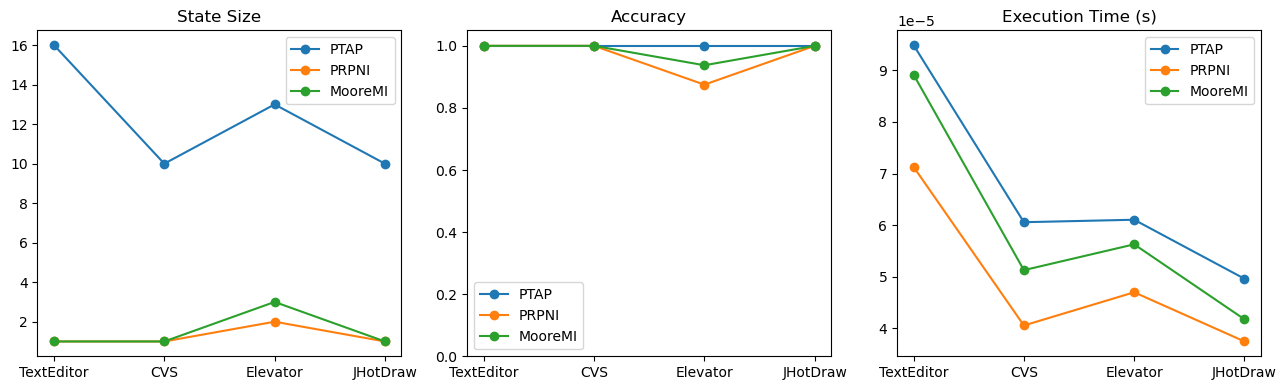

In [4]:
"""
Final Proof of Concept – COMPLETE VERSION
Learning Moore Machines from Input–Output Traces
Giantamidis et al., 2021

Algorithms:
- PTAP
- PRPNI
- MooreMI

Metrics:
- Number of states
- Accuracy
- Execution time

Benchmarks:
- TextEditor
- CVS
- Elevator
- JHotDraw
"""

import math
import time
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Dict, List, Set, Tuple
from collections import defaultdict, deque

# ============================================================
# DATA STRUCTURES
# ============================================================

@dataclass
class Trace:
    input_seq: str
    output_seq: List[str]


@dataclass
class MooreMachine:
    I: Set[str]
    O: Set[str]
    Q: Set[int]
    q0: int
    delta: Dict[Tuple[int, str], int]
    lambda_: Dict[int, str]
    name: str = ""

    def execute(self, word: str) -> List[str]:
        q = self.q0
        outputs = [self.lambda_[q]]
        for a in word:
            if (q, a) in self.delta:
                q = self.delta[(q, a)]
            outputs.append(self.lambda_[q])
        return outputs

# ============================================================
# OUTPUT ENCODING (Section 3.3)
# ============================================================

def encode_outputs(O: Set[str]) -> Dict[str, Tuple[int, ...]]:
    n = math.ceil(math.log2(len(O)))
    return {
        o: tuple((i >> k) & 1 for k in range(n))
        for i, o in enumerate(sorted(O))
    }

# ============================================================
# PTAP
# ============================================================

class PTAP:
    def __init__(self, traces: List[Trace], I: Set[str], O: Set[str]):
        self.I = I
        self.encoding = encode_outputs(O)
        self.n_bits = len(next(iter(self.encoding.values())))
        self.ptas = [defaultdict(dict) for _ in range(self.n_bits)]
        self.output_bits = [dict() for _ in range(self.n_bits)]
        self.states = set([""])
        self._build(traces)

    def _build(self, traces: List[Trace]):
        for t in traces:
            bits = self.encoding[t.output_seq[-1]]
            for b in range(self.n_bits):
                s = ""
                for a in t.input_seq:
                    self.ptas[b][s].setdefault(a, s + a)
                    s += a
                    self.states.add(s)
                self.output_bits[b][s] = bits[b]

# ============================================================
# PTAP → MOORE (baseline machine)
# ============================================================

def ptap_to_moore(ptap: PTAP) -> MooreMachine:
    states = sorted(ptap.states, key=len)
    sid = {s: i for i, s in enumerate(states)}

    inv = {v: k for k, v in encode_outputs(set(ptap.encoding)).items()}
    lambda_ = {}

    for s in states:
        bits = tuple(ptap.output_bits[b].get(s, 0) for b in range(ptap.n_bits))
        lambda_[sid[s]] = inv[bits]

    delta = {}
    for b in range(ptap.n_bits):
        for s in ptap.ptas[b]:
            for a, s2 in ptap.ptas[b][s].items():
                delta[(sid[s], a)] = sid[s2]

    return MooreMachine(
        ptap.I,
        set(inv.values()),
        set(sid.values()),
        sid[""],
        delta,
        lambda_,
        "PTAP"
    )

# ============================================================
# PRPNI (Section 5.3)
# ============================================================

def prpni(ptap: PTAP) -> MooreMachine:
    states = sorted(ptap.states, key=len)

    lambda_bits = {
        s: tuple(ptap.output_bits[b].get(s, 0) for b in range(ptap.n_bits))
        for s in states
    }

    delta = {}
    for b in range(ptap.n_bits):
        for s in ptap.ptas[b]:
            for a, s2 in ptap.ptas[b][s].items():
                delta[(s, a)] = s2

    rep = {s: s for s in states}
    for i, s1 in enumerate(states):
        for s2 in states[:i]:
            if lambda_bits[s1] == lambda_bits[s2]:
                rep[s1] = s2
                break

    uniq = list(set(rep.values()))
    sid = {s: i for i, s in enumerate(uniq)}
    inv = {v: k for k, v in encode_outputs(set(ptap.encoding)).items()}

    delta_f, lambda_f = {}, {}
    for s in states:
        q = sid[rep[s]]
        lambda_f[q] = inv[lambda_bits[s]]
        for a in ptap.I:
            if (s, a) in delta:
                delta_f[(q, a)] = sid[rep[delta[(s, a)]]]

    return MooreMachine(
        ptap.I, set(inv.values()), set(sid.values()),
        sid[rep[""]], delta_f, lambda_f, "PRPNI"
    )

# ============================================================
# MOOREMI (Section 5.4)
# ============================================================

def moore_compatible(q1, q2, lambda_bits, delta, I):
    if lambda_bits[q1] != lambda_bits[q2]:
        return False
    for a in I:
        if (q1, a) in delta and (q2, a) in delta:
            if lambda_bits[delta[(q1, a)]] != lambda_bits[delta[(q2, a)]]:
                return False
    return True


def moore_mi(ptap: PTAP) -> MooreMachine:
    states = sorted(ptap.states, key=len)

    lambda_bits = {
        s: tuple(ptap.output_bits[b].get(s, 0) for b in range(ptap.n_bits))
        for s in states
    }

    delta = {}
    for b in range(ptap.n_bits):
        for s in ptap.ptas[b]:
            for a, s2 in ptap.ptas[b][s].items():
                delta[(s, a)] = s2

    rep = {s: s for s in states}
    for i, s1 in enumerate(states):
        for s2 in states[:i]:
            if moore_compatible(s1, s2, lambda_bits, delta, ptap.I):
                rep[s1] = s2
                break

    uniq = list(set(rep.values()))
    sid = {s: i for i, s in enumerate(uniq)}
    inv = {v: k for k, v in encode_outputs(set(ptap.encoding)).items()}

    delta_f, lambda_f = {}, {}
    for s in states:
        q = sid[rep[s]]
        lambda_f[q] = inv[lambda_bits[s]]
        for a in ptap.I:
            if (s, a) in delta:
                delta_f[(q, a)] = sid[rep[delta[(s, a)]]]

    return MooreMachine(
        ptap.I, set(inv.values()), set(sid.values()),
        sid[rep[""]], delta_f, lambda_f, "MooreMI"
    )

# ============================================================
# CHARACTERISTIC SAMPLE
# ============================================================

def characteristic_sample(M: MooreMachine) -> List[Trace]:
    sp = {M.q0: ""}
    queue = deque([M.q0])

    while queue:
        q = queue.popleft()
        for a in M.I:
            if (q, a) in M.delta:
                q2 = M.delta[(q, a)]
                if q2 not in sp:
                    sp[q2] = sp[q] + a
                    queue.append(q2)

    traces = []
    for w in sp.values():
        traces.append(Trace(w, M.execute(w)))
        for a in M.I:
            traces.append(Trace(w + a, M.execute(w + a)))
    return traces

# ============================================================
# BENCHMARKS
# ============================================================

def text_editor():
    return MooreMachine(
        {'l','c','e','s','i'}, {'VALID','ERROR'}, {0,1,2,3}, 0,
        {(0,'l'):1,(1,'e'):2,(2,'s'):1,(1,'c'):0},
        {0:'VALID',1:'VALID',2:'VALID',3:'ERROR'}, "TextEditor"
    )

def cvs():
    return MooreMachine(
        {'u','c','r'}, {'OK','ERR'}, {0,1,2,3}, 0,
        {(0,'u'):1,(1,'c'):2,(2,'r'):0},
        {0:'OK',1:'OK',2:'OK',3:'ERR'}, "CVS"
    )

def elevator():
    return MooreMachine(
        {'u','d','s'}, {'MOVING','STOPPED'}, set(range(7)), 0,
        {(0,'u'):1,(1,'u'):2,(2,'s'):0,(0,'d'):3},
        {0:'STOPPED',1:'MOVING',2:'MOVING',3:'MOVING',4:'MOVING',5:'MOVING',6:'MOVING'},
        "Elevator"
    )

def jhotdraw():
    return MooreMachine(
        {'n','o','e'}, {'OK','ERR'}, {0,1,2,3,4}, 0,
        {(0,'n'):1,(1,'o'):2,(2,'e'):0},
        {q:'OK' for q in range(5)}, "JHotDraw"
    )

# ============================================================
# EXPERIMENTS + METRICS
# ============================================================

benchmarks = [text_editor(), cvs(), elevator(), jhotdraw()]
summary = []

for M in benchmarks:
    traces = characteristic_sample(M)

    t0 = time.time()
    ptap = PTAP(traces, M.I, M.O)
    ptap_m = ptap_to_moore(ptap)
    t_ptap = time.time() - t0

    t0 = time.time()
    prpni_m = prpni(ptap)
    t_prpni = time.time() - t0

    t0 = time.time()
    mooremi_m = moore_mi(ptap)
    t_mooremi = time.time() - t0

    def accuracy(Ml):
        return sum(Ml.execute(t.input_seq) == t.output_seq for t in traces) / len(traces)

    summary.append({
        "Benchmark": M.name,
        "PTAP": len(ptap_m.Q),
        "PRPNI": len(prpni_m.Q),
        "MooreMI": len(mooremi_m.Q),
        "Acc_PTAP": accuracy(ptap_m),
        "Acc_PRPNI": accuracy(prpni_m),
        "Acc_MooreMI": accuracy(mooremi_m),
        "Time_PTAP": t_ptap,
        "Time_PRPNI": t_prpni,
        "Time_MooreMI": t_mooremi
    })

# ============================================================
# TABLE
# ============================================================

print("\nSummary Table:")
for r in summary:
    print(r)

# ============================================================
# GRAPHS
# ============================================================

names = [r["Benchmark"] for r in summary]

plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
plt.plot(names, [r["PTAP"] for r in summary], marker='o', label="PTAP")
plt.plot(names, [r["PRPNI"] for r in summary], marker='o', label="PRPNI")
plt.plot(names, [r["MooreMI"] for r in summary], marker='o', label="MooreMI")
plt.title("State Size")
plt.legend()

plt.subplot(1,3,2)
plt.plot(names, [r["Acc_PTAP"] for r in summary], marker='o', label="PTAP")
plt.plot(names, [r["Acc_PRPNI"] for r in summary], marker='o', label="PRPNI")
plt.plot(names, [r["Acc_MooreMI"] for r in summary], marker='o', label="MooreMI")
plt.title("Accuracy")
plt.ylim(0,1.05)
plt.legend()

plt.subplot(1,3,3)
plt.plot(names, [r["Time_PTAP"] for r in summary], marker='o', label="PTAP")
plt.plot(names, [r["Time_PRPNI"] for r in summary], marker='o', label="PRPNI")
plt.plot(names, [r["Time_MooreMI"] for r in summary], marker='o', label="MooreMI")
plt.title("Execution Time (s)")
plt.legend()

plt.tight_layout()
plt.show()
